In [150]:
import pandas as pd

train = pd.read_csv('./train.csv', keep_default_na=False)
train

,label,document
0,0,주말에 사람이 적은 편. 2층 와이파이가 안돼서 1층 와이파이에 연결했는데 불안정함.
1,1,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,1,방금 확인했어요~
3,0,별적립 12개 무료음료쿠폰으로는 프리퀀시적립이 안된다기에 (작년에는 됐던것같아서) ...
4,1,요 근처에서 보기드물게 넓고 쾌적한 스벅이네요~
...,...,...
3792,1,직원분들 친절했어요
3793,1,너무 맘에드네요. 주차도 가능하구요~
3794,0,"계산하는 나이 있어보이는 여자, 자기 잘못을 고객에게 전가하려 하고 싸가지 없음! ..."
3795,1,확트인공간 맛난커피 그런데 주차가 ㅠㅠ딱지끊은적잇음료 길가주차하지마세요


In [151]:
test = pd.read_csv('./test.csv', encoding='cp949', keep_default_na=False)
test.drop('no', axis = 1, inplace=True)
test

,document
0,화장실이 좀 별로지만 직원분들 다 친절하시고 매장 깔끔함
1,최고예요
2,서비스 굿
3,"친절하고, 자리 넓고 좋아요"
4,최고예요
...,...
1261,드라이브쓰루 좋아요
1262,사이렌오더 확인안함.. 직원 5명 아무것도 안하고 수다떨고.. 매장와서 사이렌오더...
1263,스타벅스는 직원교육으로 유명한데.. 여기 스탭님들은 왜....
1264,조금 아쉬워요


In [152]:
test.isnull().sum(), train.isnull().sum()

(document    0
 dtype: int64,
 label       0
 document    0
 dtype: int64)

In [153]:
# # document 열과 label 열의 중복을 제외한 값의 개수
# train['document'].nunique(), train['label'].nunique()

# # document 열의 중복 제거
# train.drop_duplicates(subset=['document'], inplace=True)

print('총 샘플의 수:', len(train))

총 샘플의 수: 3797


<Axes: xlabel='label'>

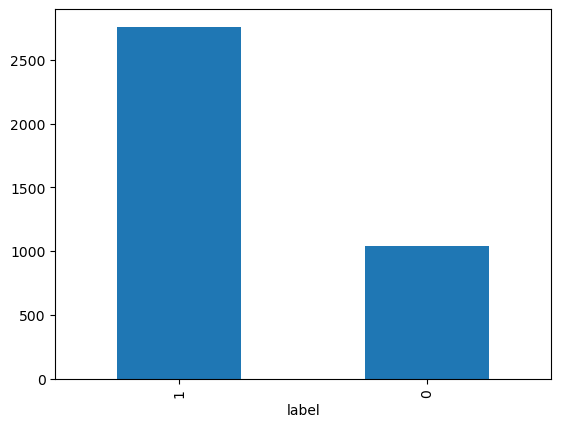

In [154]:
train['label'].value_counts().plot(kind='bar')

In [155]:
print(train.isnull().values.any())  # True면 널값 존재

False


In [156]:
import re
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [160]:
# 한글과 공백을 제외하고 모두 제거
train['document'] = train['document'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train[:5]

,label,document
0,0,주말에 사람이 적은 편. 2층 와이파이가 안돼서 1층 와이파이에 연결했는데 불안정함.
1,1,파트너분들 진짜 세상 친절하시고 너무 좋아요ㅎ
2,1,방금 확인했어요~
3,0,별적립 12개 무료음료쿠폰으로는 프리퀀시적립이 안된다기에 (작년에는 됐던것같아서) ...
4,1,요 근처에서 보기드물게 넓고 쾌적한 스벅이네요~


In [162]:
import numpy as np

train['document'] = train['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train['document'].replace('', np.nan, inplace=True)
print(train.isnull().sum())

label       0
document    0
dtype: int64


In [164]:
# test.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test['document'] = test['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
# test = test.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test))

전처리 후 테스트용 샘플의 개수 : 1266


In [196]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '~', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '?',',', 'a','b','c','f','d','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [197]:
from konlpy.tag import Okt
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [198]:
X_train = []
for sentence in train['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

In [199]:
print(X_train[:3])

[['주말', '사람', '적다', '편', '층', '와이파이', '안', '돼다', '층', '와이파이', '연결하다', '불안정하다'], ['파트너', '분들', '진짜', '세상', '친절하다', '너무', '좋다', 'ㅎ'], ['방금', '확인']]


In [200]:
X_test = []
for sentence in test['document']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

In [201]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [202]:
print(tokenizer.word_index)

{'좋다': 1, '예요': 2, '친절하다': 3, '최고': 4, '직원': 5, '있다': 6, '없다': 7, '매장': 8, '너무': 9, '사람': 10, '많다': 11, '..': 12, '분들': 13, '커피': 14, '스타벅스': 15, '분': 16, '자리': 17, '보다': 18, '안': 19, '맛': 20, '넓다': 21, '스벅': 22, '...': 23, '을': 24, '가다': 25, '곳': 26, '다': 27, '주문': 28, '층': 29, '음료': 30, '않다': 31, '되다': 32, '로': 33, '별로': 34, '에서': 35, '같다': 36, '때': 37, '\\': 38, '이다': 39, '다른': 40, '불친절하다': 41, '오다': 42, '여기': 43, '요': 44, '화장실': 45, '고': 46, '맛있다': 47, '만': 48, '아니다': 49, '아쉽다': 50, '조금': 51, '받다': 52, '하고': 53, '항상': 54, '해주다': 55, '중': 56, '기분': 57, '것': 58, '파트너': 59, '먹다': 60, '분위기': 61, '들다': 62, '친절': 63, '그렇다': 64, '적': 65, '나오다': 66, '못': 67, '손님': 68, '말': 69, '자다': 70, '자주': 71, '나': 72, '서비스': 73, '남자': 74, '진짜': 75, '정말': 76, '많이': 77, '점': 78, '안되다': 79, '주차': 80, '지점': 81, '불친절': 82, '시끄럽다': 83, '일': 84, '그': 85, '더': 86, '주다': 87, '리저': 88, '엄청': 89, 'ㅠㅠ': 90, '공부': 91, '!!': 92, '시간': 93, '^^': 94, '여자': 95, '그냥': 96, '조용하다': 97, '앉다': 98, '인': 99, '제': 100, '인데': 1

In [203]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 5134
등장 빈도가 2번 이하인 희귀 단어의 수: 3369
단어 집합에서 희귀 단어의 비율: 65.62134787689911
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.605588449153423


In [204]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1766


In [205]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [206]:
print(X_train[:3])

[[184, 10, 221, 257, 29, 170, 19, 258, 29, 170], [59, 13, 75, 464, 3, 9, 1, 242], [259]]


In [207]:
y_train = np.array(train['label'])

In [208]:
# 빈 샘플(empty samples) 제거
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

리뷰의 최대 길이 : 139
리뷰의 평균 길이 : 9.066104819594416


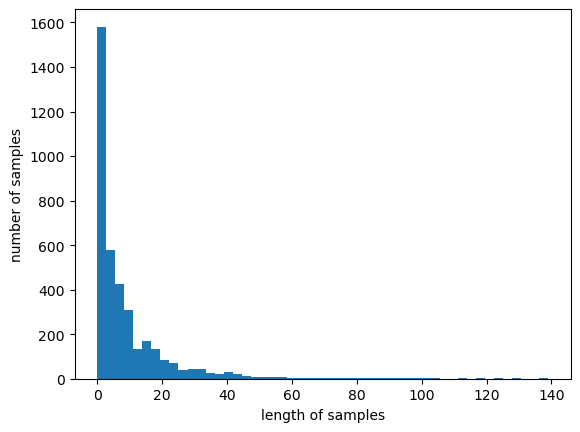

In [209]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [210]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [211]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.02159599683961


In [212]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [218]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
45/48 [===========================>..] - ETA: 0s - loss: 0.4829 - acc: 0.7646
Epoch 1: val_acc improved from -inf to 0.75263, saving model to best_model.h5
48/48 [==============================] - 4s 36ms/step - loss: 0.4719 - acc: 0.7708 - val_loss: 0.5386 - val_acc: 0.7526
Epoch 2/15
 7/48 [===>..........................] - ETA: 0s - loss: 0.2468 - acc: 0.9174

c:\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/48 [===========================>..] - ETA: 0s - loss: 0.2242 - acc: 0.9229
Epoch 2: val_acc did not improve from 0.75263
48/48 [==============================] - 1s 22ms/step - loss: 0.2205 - acc: 0.9239 - val_loss: 0.5017 - val_acc: 0.7474
Epoch 3/15
46/48 [===========================>..] - ETA: 0s - loss: 0.1270 - acc: 0.9558
Epoch 3: val_acc improved from 0.75263 to 0.76842, saving model to best_model.h5
48/48 [==============================] - 1s 22ms/step - loss: 0.1285 - acc: 0.9549 - val_loss: 0.4436 - val_acc: 0.7684
Epoch 4/15
47/48 [============================>.] - ETA: 0s - loss: 0.1067 - acc: 0.9614
Epoch 4: val_acc improved from 0.76842 to 0.78026, saving model to best_model.h5
48/48 [==============================] - 1s 21ms/step - loss: 0.1066 - acc: 0.9611 - val_loss: 0.4181 - val_acc: 0.7803
Epoch 5/15
46/48 [===========================>..] - ETA: 0s - loss: 0.0815 - acc: 0.9704
Epoch 5: val_acc improved from 0.78026 to 0.79079, saving model to best_model.h5
48/48 

In [219]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_train, y_train)[1]))

119/119 [==============================] - 1s 6ms/step - loss: 0.1130 - acc: 0.9679

 테스트 정확도: 0.9679


In [220]:
y_pred = model.predict(X_test)

40/40 [==============================] - 1s 5ms/step


In [221]:
# 임계값 설정
threshold = 0.5

# 확률 값을 0 또는 1로 변환
predictions = (y_pred > threshold).astype(int)

print(len(predictions))


1266


In [222]:
sbm = pd.read_csv('./submission.csv')
sbm['class'] = predictions
sbm.to_csv('./submission.csv', index=False)